# Exercise 3 – Exploratory analysis of air quality data

In this exercise you will practice basic exploratory data analysis (EDA) and time-series analysis in Python.  
**Methodologically**, the goal is to learn how to:

- Load and clean environmental monitoring data in.
- Build a proper time axis from separate date/time fields.
- Explore distributions, variability and outliers using graphical tools.
- Investigate temporal patterns and dominant frequencies.
- Explore multivariate relationships and detect unusual episodes with dimensionality-reduction methods.

**Application-wise**, we work with urban air quality measurements (e.g. NO₂, PM₁₀, O₃, CO, temperature, humidity, wind speed) from an air-quality monitoring station. The aim is to understand how pollution levels vary over time and how they relate to each other and to meteorological conditions.

---

## Your task

Using the provided air-quality dataset, you should:

1. **Import and prepare the data**
   - Upload the CSV file.
   - Read it into a `pandas` DataFrame.
   - Create a standardized `datetime` column that combines the year, Julian day and hour information.

2. **Describe distributions and outliers**
   - Use histograms and boxplots to describe the distribution and variability of the main pollutants.
   - Identify possible outliers and comment on how they appear in the plots.

3. **Explore temporal patterns**
   - Produce time-series plots and aggregated summaries (e.g. by hour of day, day of week, season).
   - Characterise typical daily, weekly and seasonal cycles in pollutant concentrations.

4. **Study relationships between variables**
   - Use scatterplots, correlation matrices and other multivariate tools to explore how pollutants relate to each other and to meteorological variables.

5. **Analyse cycles and dominant frequencies**
   - Use ACF and FFT/periodogram methods to identify dominant temporal cycles (e.g. daily or weekly patterns) for PM₁₀ and other pollutants.

6. **Use dimensionality reduction**
   - Apply Sammon mapping / MDS (as provided later in the notebook) to visualise similarities and differences between observations and to highlight extreme pollution episodes.

7. **Answer the guiding questions**
   - For each section of the exercise, answer the questions that follow the code cells, using your plots and summaries as evidence for your conclusions.

The code cells below provide a starting point for each step. Your job is to run, modify and extend them so that you can carry out the analyses listed above and interpret the results.

In [18]:
# With this code you can directly get access to your own disk and upload it to Google Colab
# from google.colab import files
import pandas as pd
# import io

# # 1) Upload the CSV file
# uploaded = files.upload()   # Opens a file picker in Colab

# # 2) Extract the filename
# fname = next(iter(uploaded))

# # 3) Load CSV into a pandas DataFrame
# df = pd.read_csv(io.BytesIO(uploaded[fname]), sep=';', decimal=',')

df= pd.read_csv("AQdataNumber(AQdata).csv",  sep=';', decimal=',')
# 4) Display the first rows
df.head()
# with following code you get get acees to uploded files in Google colab
#df= pd.read_csv("toolo.csv",  sep=';', decimal=',')

,ID,Year,Julianday,Time,NO2,O3,PM10,CO,temperature,humidity,windspeed,sinJD,cosJD,sinTime,cosTime
0,1,1996,1,1,77.0,11.0,23.00,1.5,-5.55,97.0,1.3,0.02,1.0,0.26,0.97
1,2,1996,1,2,71.0,10.0,23.00,1.6,-5.55,97.0,1.3,0.02,1.0,0.50,0.87
2,3,1996,1,3,62.0,8.0,17.33,0.8,-6.05,97.0,1.3,0.02,1.0,0.71,0.71
3,4,1996,1,4,60.5,8.0,17.33,0.7,-6.55,97.0,1.3,0.02,1.0,0.87,0.50
4,5,1996,1,5,59.0,10.0,17.33,0.7,-6.95,97.0,1.3,0.02,1.0,0.97,0.26


sep=';' means the CSV file uses semicolons as separators (common in European data).

decimal=',' means numbers use a comma instead of a dot for decimals.

df.head() shows the first 5 rows of the dataset.

Creating a Standardized Date Column

In [19]:
df['Standard_Date'] = pd.to_datetime(
    df['Year'].astype(str) + '-' + df['Julianday'].astype(str),
    format='%Y-%j'
)
df['Standard_Date'] = df['Standard_Date'] + pd.to_timedelta(df['Time'], unit='H')
df

,ID,Year,Julianday,Time,NO2,O3,PM10,CO,temperature,humidity,windspeed,sinJD,cosJD,sinTime,cosTime,Standard_Date
0,1,1996,1,1,77.00,11.00,23.00,1.5,-5.55,97.0,1.30,0.02,1.0,0.26,0.97,1996-01-01 01:00:00
1,2,1996,1,2,71.00,10.00,23.00,1.6,-5.55,97.0,1.30,0.02,1.0,0.50,0.87,1996-01-01 02:00:00
2,3,1996,1,3,62.00,8.00,17.33,0.8,-6.05,97.0,1.30,0.02,1.0,0.71,0.71,1996-01-01 03:00:00
3,4,1996,1,4,60.50,8.00,17.33,0.7,-6.55,97.0,1.30,0.02,1.0,0.87,0.50,1996-01-01 04:00:00
4,5,1996,1,5,59.00,10.00,17.33,0.7,-6.95,97.0,1.30,0.02,1.0,0.97,0.26,1996-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,1999,365,20,24.00,16.00,35.00,0.3,-10.35,91.0,3.71,0.00,1.0,-0.87,0.50,1999-12-31 20:00:00
35060,35061,1999,365,21,27.00,12.00,63.00,0.4,-11.35,89.3,3.47,0.00,1.0,-0.71,0.71,1999-12-31 21:00:00
35061,35062,1999,365,22,20.33,28.67,46.67,0.4,-12.35,87.7,3.22,0.00,1.0,-0.50,0.87,1999-12-31 22:00:00
35062,35063,1999,365,23,13.67,45.33,30.33,0.4,-13.25,86.0,2.97,0.00,1.0,-0.26,0.97,1999-12-31 23:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Make a copy to avoid modifying the original in case we re-run cells
d = df.copy()

# 2) Build a proper datetime from Year + Julianday + Time (hour 1–24 in your data)
#    - Start from Jan 1st of each Year, add (Julianday-1) days, then add (Time-1) hours
base = pd.to_datetime(d["Year"].astype(int).astype(str), format="%Y")
d["Standard_Date"] = base + pd.to_timedelta(d["Julianday"] - 1, unit="D") + pd.to_timedelta(d["Time"] - 1, unit="h")

# 3) Set the datetime as index and sort (best practice for time-based plots)
d = d.set_index("Standard_Date").sort_index()

# 4) Pick environmental variables we’ll visualize
env_cols = ["NO2", "O3", "PM10", "CO", "temperature", "humidity", "windspeed"]

# 5) Quick peek to confirm structure
display(d[env_cols].head())

,NO2,O3,PM10,CO,temperature,humidity,windspeed
Standard_Date,,,,,,,
1996-01-01 00:00:00,77.0,11.0,23.00,1.5,-5.55,97.0,1.3
1996-01-01 01:00:00,71.0,10.0,23.00,1.6,-5.55,97.0,1.3
1996-01-01 02:00:00,62.0,8.0,17.33,0.8,-6.05,97.0,1.3
1996-01-01 03:00:00,60.5,8.0,17.33,0.7,-6.55,97.0,1.3
1996-01-01 04:00:00,59.0,10.0,17.33,0.7,-6.95,97.0,1.3


##1) Histograms

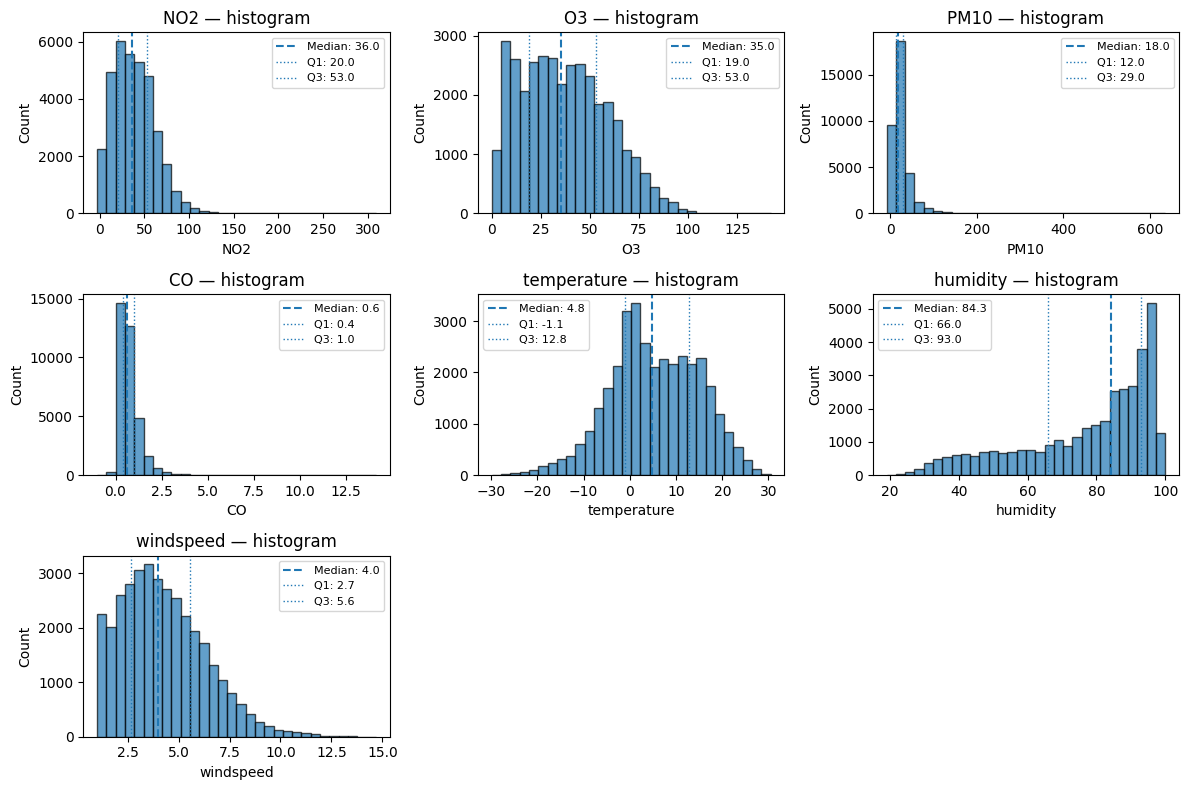

In [24]:
# --- HISTOGRAMS ---
# Goal: see the distribution (shape, center, spread, tails) of each variable.

plt.figure(figsize=(12, 8))

# 1) Loop over variables to create small multiples
for i, col in enumerate(env_cols, start=1):
    plt.subplot(3, 3, i)  # 3 rows x 3 cols grid
    x = d[col].dropna()   # 2) Drop missing values for honest histograms

    # 3) Plot histogram; bins=30 is a good starting point for hourly env data
    plt.hist(x, bins=30, edgecolor="black", alpha=0.7)

    # 4) Add reference lines for median and 25th/75th percentiles
    q25, q50, q75 = np.percentile(x, [25, 50, 75])
    plt.axvline(q50, linestyle="--", linewidth=1.5, label=f"Median: {q50:.1f}")
    plt.axvline(q25, linestyle=":", linewidth=1, label=f"Q1: {q25:.1f}")
    plt.axvline(q75, linestyle=":", linewidth=1, label=f"Q3: {q75:.1f}")

    # 5) Titles + axis labels (include units where you have them)
    plt.title(f"{col} — histogram")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

Questions:

What is the distribution of the environmental variables?

Can any outliers be identified from the histogram?

How do NO₂ and PM₁₀ compare in terms of variability?

How does changing the number of bins affect the appearance and interpretation of the histogram?


##2) Boxplots

C:\Users\steph\AppData\Local\Temp\ipykernel_16840\2213183025.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_for_box, labels=env_cols, patch_artist=True, showfliers=True)


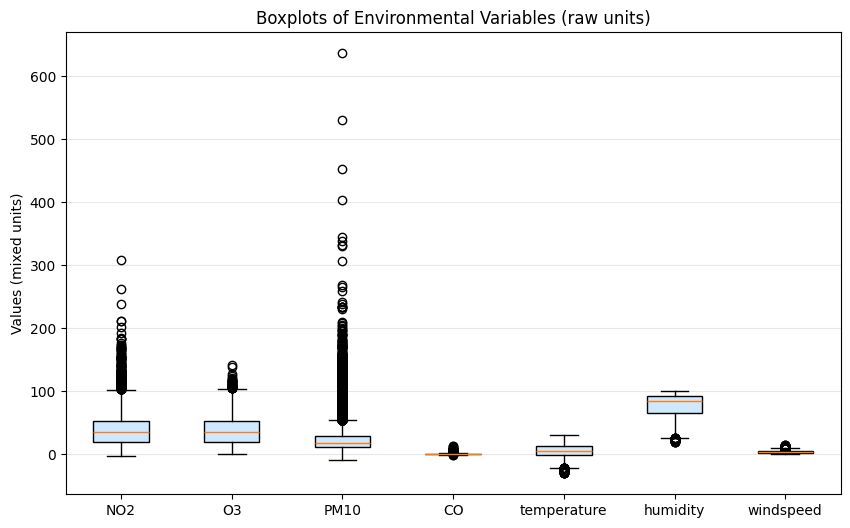

In [5]:
# --- BOXPLOTS ---
# Goal: compare medians and spreads across variables quickly.

plt.figure(figsize=(10, 6))

# 1) Prepare data as a list of arrays (drop NaNs for each variable)
data_for_box = [d[c].dropna().values for c in env_cols]

# 2) Draw boxplots (patch_artist=True allows colored boxes if we want)
bp = plt.boxplot(data_for_box, labels=env_cols, patch_artist=True, showfliers=True)

# 3) Optional: set simple fill so boxes stand out
for box in bp["boxes"]:
    box.set_facecolor("#cfe8ff")  # light blue

# 4) Add titles/labels
plt.title("Boxplots of Environmental Variables (raw units)")
plt.ylabel("Values (mixed units)")
plt.grid(True, axis="y", alpha=0.3)
plt.xticks(rotation=0)
plt.show()

Questions:

Which variable shows the largest IQR (spread)? What could drive that?

Which has the highest median?

Where do you see many outliers?

Compare NO₂ and PM₁₀: which shows greater spread (IQR) and more extreme outliers?

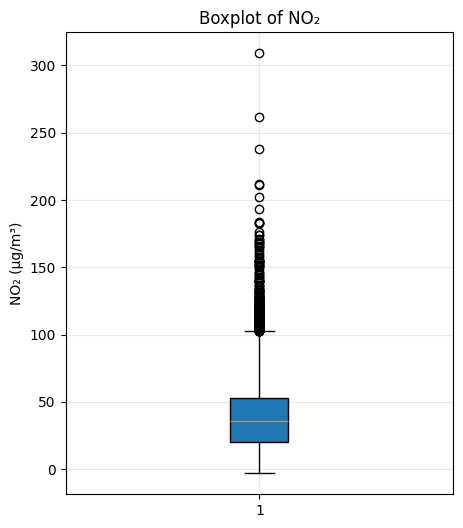

C:\Users\steph\AppData\Local\Temp\ipykernel_16840\1567312237.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d[c].dropna() for c in env_cols], labels=env_cols, vert=False, patch_artist=True)


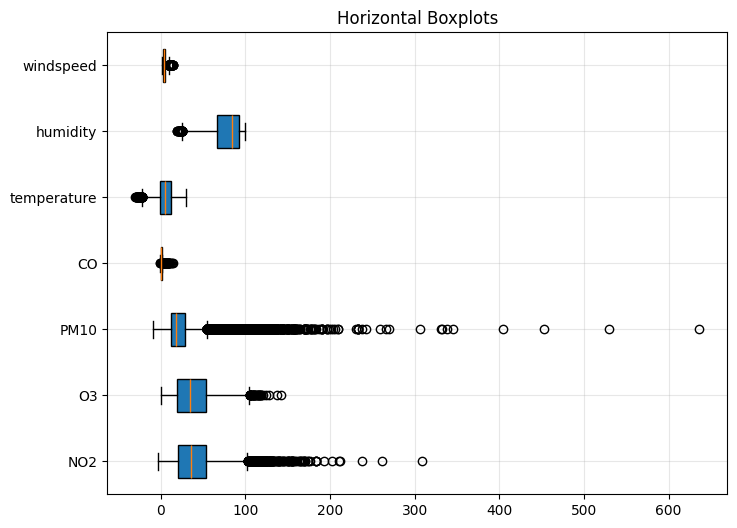

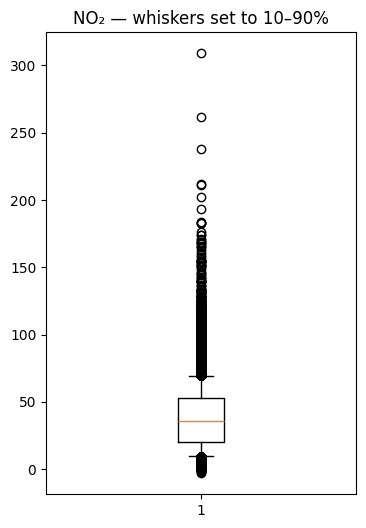

In [6]:
# Single variable boxplot (e.g., NO2)
plt.figure(figsize=(5,6))
plt.boxplot(d["NO2"].dropna(), vert=True, patch_artist=True)
plt.title("Boxplot of NO₂")
plt.ylabel("NO₂ (µg/m³)")
plt.grid(True, alpha=0.3)
plt.show()

# Horizontal boxplots for readability
plt.figure(figsize=(8,6))
plt.boxplot([d[c].dropna() for c in env_cols], labels=env_cols, vert=False, patch_artist=True)
plt.title("Horizontal Boxplots")
plt.grid(True, alpha=0.3)
plt.show()

# Custom whiskers (e.g., 10th–90th percentiles)
x = d["NO2"].dropna()
plt.figure(figsize=(4,6))
plt.boxplot(x, whis=[10, 90])
plt.title("NO₂ — whiskers set to 10–90%")
plt.show()

##3) Scatter Plots

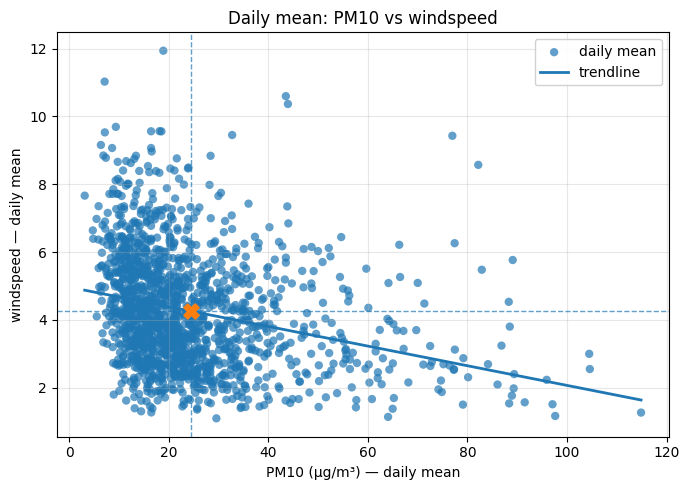

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure a DatetimeIndex
if not isinstance(d.index, pd.DatetimeIndex):
    if 'timestamp' in d.columns:
        d = d.assign(timestamp=pd.to_datetime(d['timestamp'])).set_index('timestamp')

# Daily means
daily_xy = d[['PM10', 'windspeed']].resample('D').mean().dropna()
x = daily_xy['PM10'].to_numpy()
y = daily_xy['windspeed'].to_numpy()

# Means (for crosshairs only; no labels)
x_mean = x.mean()
y_mean = y.mean()

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7, edgecolor="none", label="daily mean")
plt.title("Daily mean: PM10 vs windspeed")
plt.xlabel("PM10 (µg/m³) — daily mean")
plt.ylabel("windspeed — daily mean")
plt.grid(True, alpha=0.3)

# Mean crosshairs + mean point (no legend labels, no text)
plt.axvline(x_mean, linestyle="--", alpha=0.7, linewidth=1)
plt.axhline(y_mean, linestyle="--", alpha=0.7, linewidth=1)
plt.scatter([x_mean], [y_mean], s=120, marker="X", zorder=3)

# Linear trendline (no equation text, no R²)
m, b = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 200)
plt.plot(xline, m*xline + b, linewidth=2, label="trendline")

plt.legend(loc="best", framealpha=0.9)
plt.tight_layout()
plt.show()




Questions:


Do NO₂ and humidity move together? Is the trend positive, negative, or no clear trend?

Is the cloud compact (strong association) or widely scattered (weak association)?

Looks linear or curved (e.g., flattening at high humidity)?

Conisder other environmetnal variables and report whcih of them  have weak and strong correaltion and why?

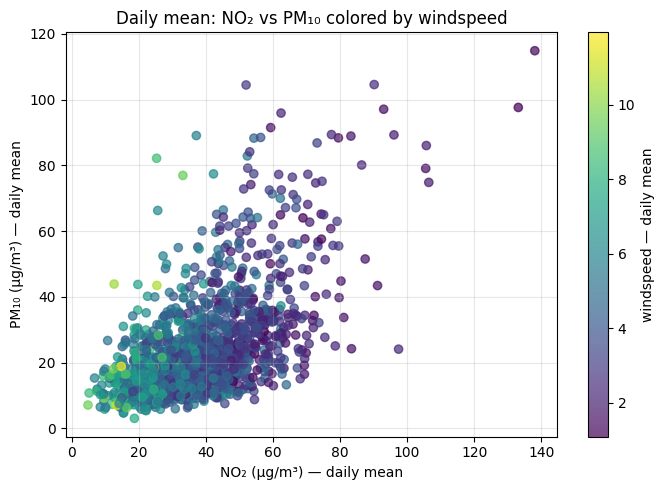

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


if not isinstance(d.index, pd.DatetimeIndex):
    if 'timestamp' in d.columns:
        d = d.assign(timestamp=pd.to_datetime(d['timestamp'])).set_index('timestamp')

# Compute daily means for needed columns
daily = d[['NO2', 'PM10', 'windspeed', 'humidity']].resample('D').mean()

# --- Color by windspeed (daily means) ---
xyc = daily[['NO2', 'PM10', 'windspeed']].dropna()
plt.figure(figsize=(7,5))
sc = plt.scatter(xyc['NO2'], xyc['PM10'], c=xyc['windspeed'], alpha=0.7)
plt.colorbar(sc, label="windspeed — daily mean")
plt.title("Daily mean: NO₂ vs PM₁₀ colored by windspeed")
plt.xlabel("NO₂ (µg/m³) — daily mean")
plt.ylabel("PM₁₀ (µg/m³) — daily mean")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Question:
 What is the relationship between daily-mean PM₁₀ and NO₂? Describe the direction and strength.

Do PM₁₀ and NO₂ have the same correlation with daily-mean wind speed?

##Time-series Visualization

In [9]:
# --- One-time prep: create a clean datetime index ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Work on a copy so original df stays intact
d = df.copy()

# 2) Build datetime from Year + Julian day + hour (Time = 1..24 in your data)
# Adjusting the calculation to ensure unique timestamps
# The original code might create duplicate timestamps if Time=24 in one day is the same as Time=0 on the next day.
# Given 'Time' is 1-24, we subtract 1 to make it 0-23 hours for adding to the date.
base = pd.to_datetime(d["Year"].astype(int).astype(str), format="%Y")
d["Standard_Date"] = base + pd.to_timedelta(d["Julianday"] - 1, unit="D") + pd.to_timedelta(d["Time"] - 1, unit="h")


# 3) Set index to time and sort (best practice for time-series work)
# Before setting the index, check for and handle potential duplicates in the Standard_Date column
# If duplicates exist, reseting the index and dropping duplicates before setting the index back can resolve the issue
if d['Standard_Date'].duplicated().any():
  print("Warning: Duplicate timestamps found. Removing duplicates before setting index.")
  d = d.reset_index(drop=True).drop_duplicates(subset=['Standard_Date']).set_index("Standard_Date").sort_index()
else:
  d = d.set_index("Standard_Date").sort_index()


# 4) Pick a few variables for this task
vars_ts = ["NO2", "PM10", "O3", "temperature", "humidity", "windspeed"]

# 5) Optional: ensure hourly continuity (resample) while keeping the original too
#    - This creates a regular hourly index and preserves NaN where data is missing.
d_hr = d[vars_ts].resample("h").asfreq()

display(d_hr.head())

,NO2,PM10,O3,temperature,humidity,windspeed
Standard_Date,,,,,,
1996-01-01 00:00:00,77.0,23.00,11.0,-5.55,97.0,1.3
1996-01-01 01:00:00,71.0,23.00,10.0,-5.55,97.0,1.3
1996-01-01 02:00:00,62.0,17.33,8.0,-6.05,97.0,1.3
1996-01-01 03:00:00,60.5,17.33,8.0,-6.55,97.0,1.3
1996-01-01 04:00:00,59.0,17.33,10.0,-6.95,97.0,1.3


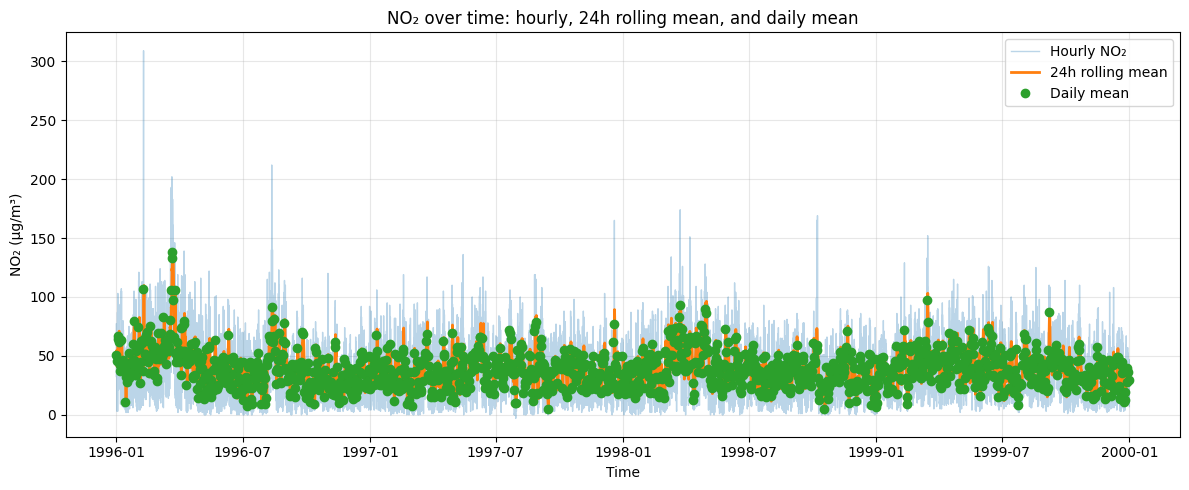

In [10]:
# --- TIME-SERIES PLOTS ---
# Goal: see episodes, trends, and smoother signals for readability.

# 1) Choose a primary variable (change here to explore others)
y = d_hr["NO2"]  # hourly NO2 (µg/m³)

# 2) Create smoothed versions:
y_roll24 = y.rolling(window=24, min_periods=12).mean()  # 24h rolling mean (diurnal smoothing)
y_daily  = y.resample("D").mean()                       # daily average

# 3) Plot raw hourly, rolling mean, and daily mean together
plt.figure(figsize=(12,5))
plt.plot(y.index, y.values, alpha=0.3, linewidth=1, label="Hourly NO₂")
plt.plot(y_roll24.index, y_roll24.values, linewidth=2, label="24h rolling mean")
plt.plot(y_daily.index, y_daily.values, marker="o", linestyle="none", label="Daily mean")

# 4) Labels and layout
plt.title("NO₂ over time: hourly, 24h rolling mean, and daily mean")
plt.xlabel("Time"); plt.ylabel("NO₂ (µg/m³)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Questions:

What information do you lose/gain moving from hourly → daily?

Any gradual rise/fall across months?


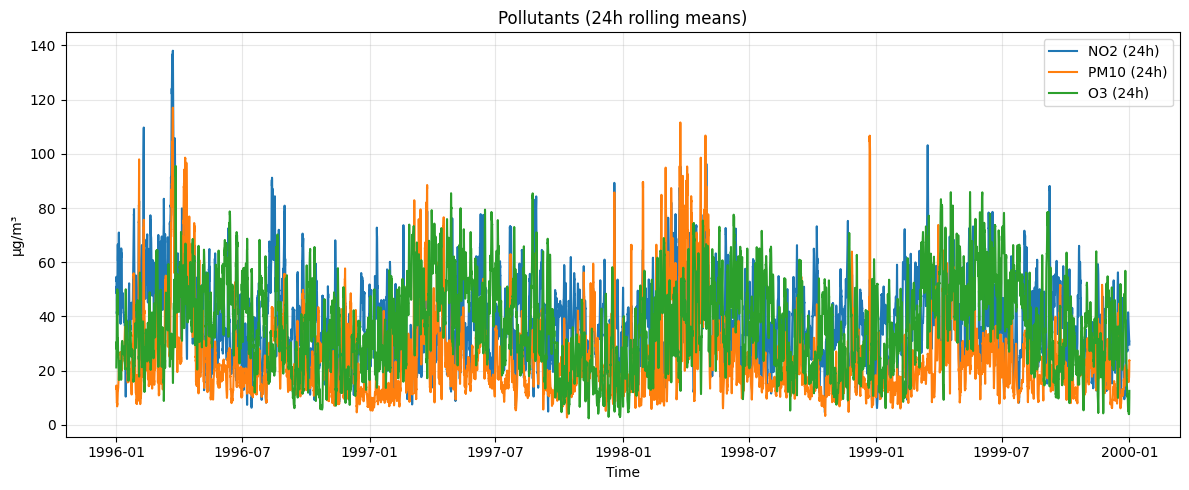

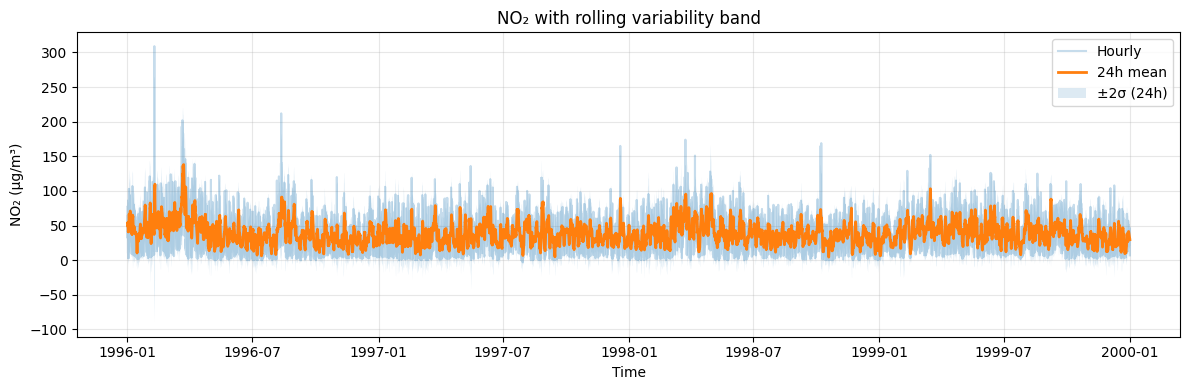

In [11]:
# Compare multiple pollutants (smoothed) in one view
plt.figure(figsize=(12,5))
for col in ["NO2","PM10","O3"]:
    plt.plot(d_hr.index, d_hr[col].rolling(24, min_periods=12).mean(), label=f"{col} (24h)")
plt.title("Pollutants (24h rolling means)")
plt.xlabel("Time"); plt.ylabel("µg/m³")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# Add uncertainty band (rolling ±2σ)
m = y_roll24
s = y.rolling(24, min_periods=12).std()
plt.figure(figsize=(12,4))
plt.plot(y.index, y, alpha=0.25, label="Hourly")
plt.plot(m.index, m, linewidth=2, label="24h mean")
plt.fill_between(m.index, (m-2*s), (m+2*s), alpha=0.15, label="±2σ (24h)")
plt.title("NO₂ with rolling variability band"); plt.xlabel("Time"); plt.ylabel("NO₂ (µg/m³)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


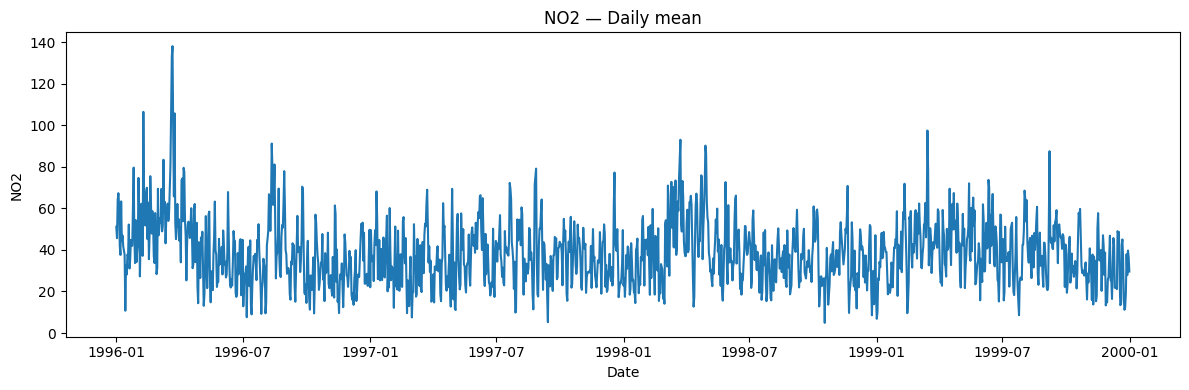

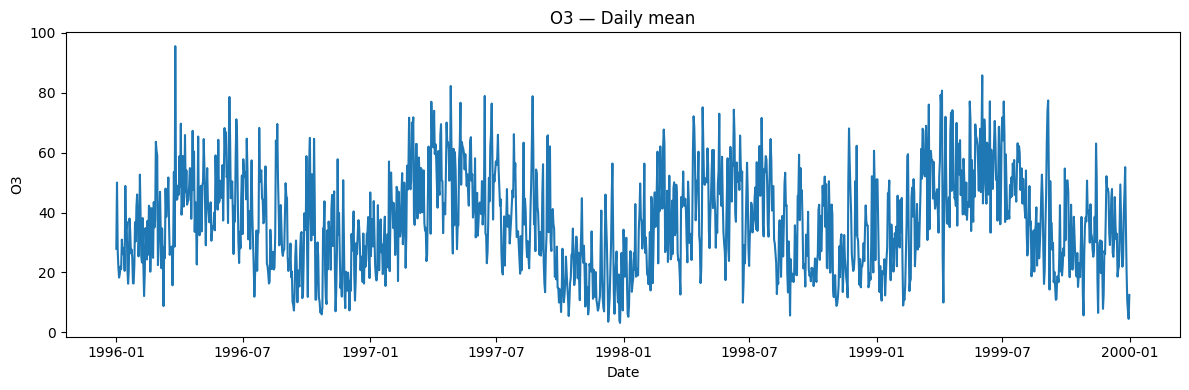

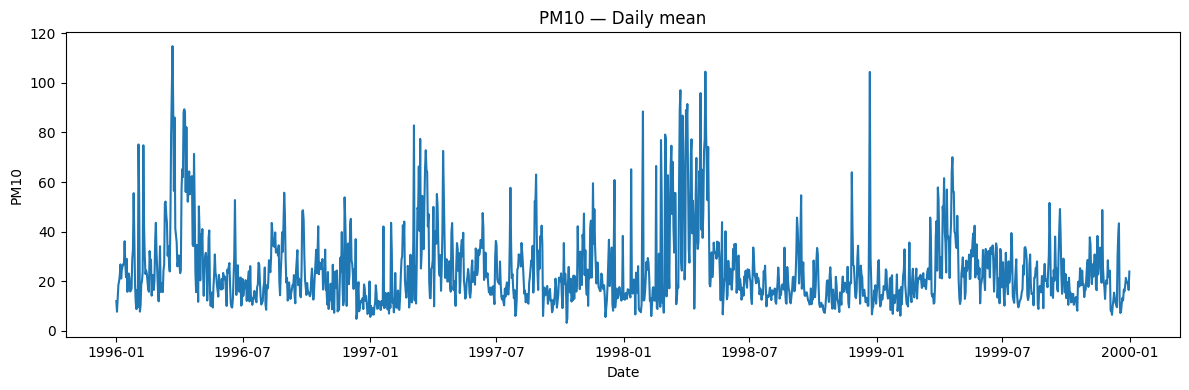

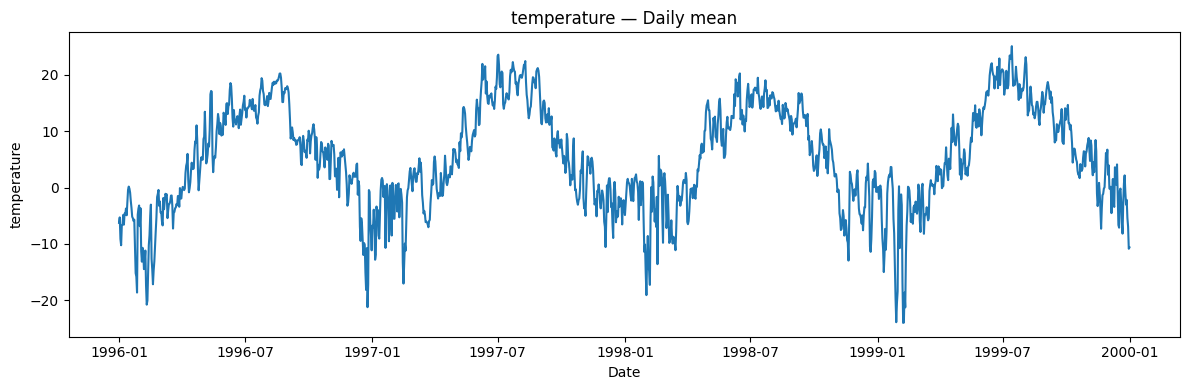

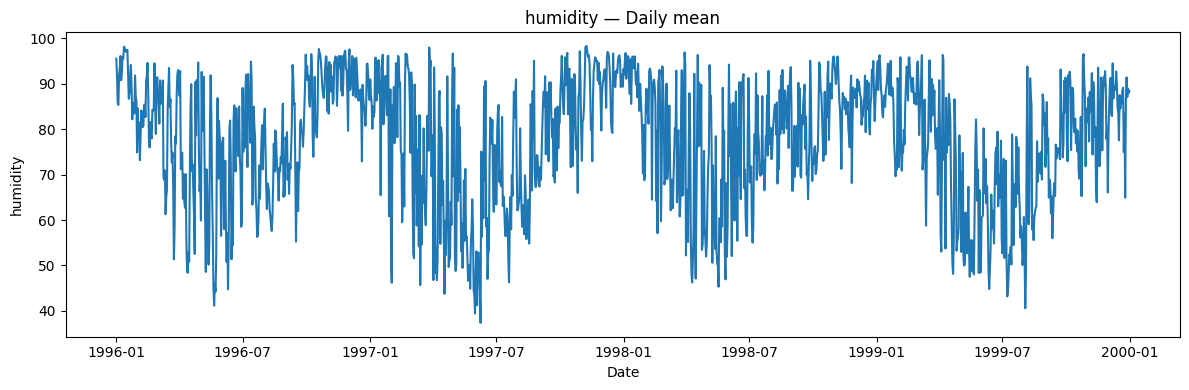

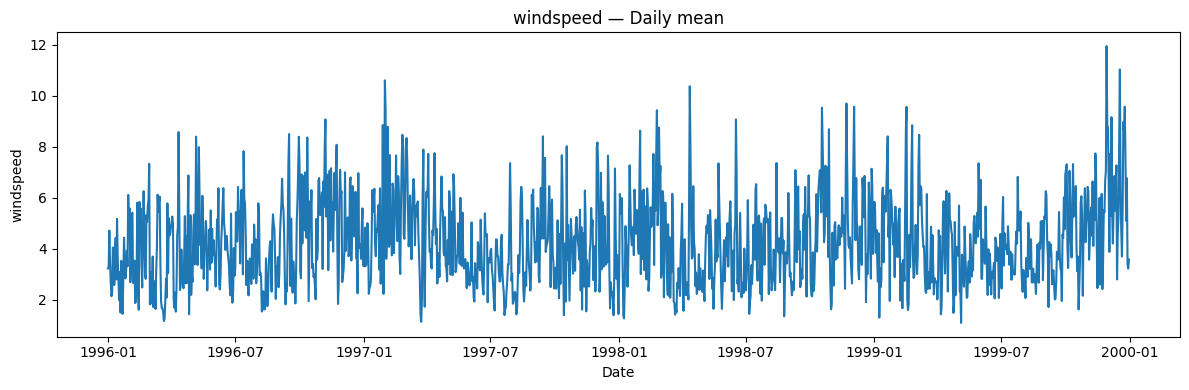

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

env_cols = ["NO2", "O3", "PM10", "temperature", "humidity", "windspeed"]

# Ensure DatetimeIndex for resampling
if not isinstance(d_hr.index, pd.DatetimeIndex):
    if "timestamp" in d_hr.columns:
        d_hr = d_hr.assign(timestamp=pd.to_datetime(d_hr["timestamp"])).set_index("timestamp")
    else:
        raise ValueError("d_hr must have a DatetimeIndex or a 'timestamp' column.")

# Compute DAILY means
daily = d_hr[env_cols].resample("D").mean()

# Plot each variable's daily mean (minimal styling)
for col in env_cols:
    if col not in daily.columns:
        continue
    plt.figure(figsize=(12, 4))
    plt.plot(daily.index, daily[col], linewidth=1.5)
    plt.title(f"{col} — Daily mean")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



Question:
What is the long term trend of the environmental variables?

Do you see any Seasonality in environment variables?

##Autocorrelation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# 1) Choose a variable (hourly series); interpolate gently
y_ac = d_hr["PM10"].interpolate(limit_direction="both")  # PM10 (µg/m³)
max_lag = 24 * 14
lags, ac = autocorr_series(y_ac, max_lag=max_lag)

# 2) Plot the ACF with x-axis ticks every 24 hours
fig, ax = plt.subplots(figsize=(12, 4))
ax.stem(lags, ac, basefmt=" ")
ax.set_title("Autocorrelation of PM₁₀ (hourly) — up to 14 days")
ax.set_xlabel("Lag (hours)")
ax.set_ylabel("Autocorrelation")

# --- key lines for 24-by-24 ticks ---
ax.xaxis.set_major_locator(MultipleLocator(24))   # major ticks every 24h
ax.grid(True, which="major", alpha=0.3)

plt.tight_layout()
plt.show()


NameError: name 'autocorr_series' is not defined

Questions:
Look at the PM₁₀ ACF plot. What are the first two or three tallest peaks (excluding lag 0)? About what lags (in hours) do they occur, and why do you think those peaks appear?

Do you see a repeating pattern in the ACF? If yes, briefly explain why this pattern might happen.

FFT / Periodogram

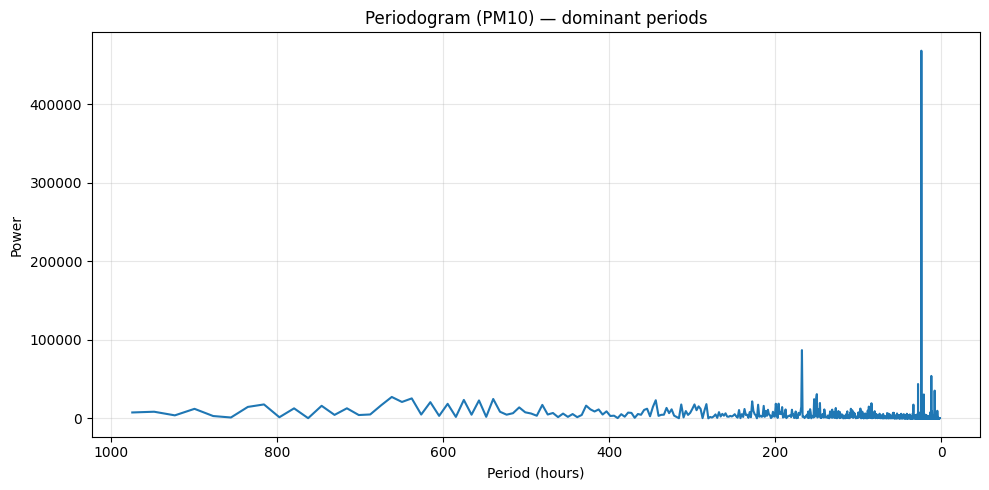

In [14]:
# --- FFT / PERIODAGRAM ---
# Steps: (a) make a regular hourly series, (b) detrend/demean, (c) FFT,
#        (d) convert frequency to period in hours, (e) plot power vs period.

# 1) Select a variable and ensure regular hourly spacing
x = d_hr["PM10"].copy()

# 2) Fill small gaps to avoid spectral leakage (cautious!):
x = x.interpolate(limit=6)     # fill up to 6h gaps
x = x.fillna(method="bfill")   # backfill if still NaN at start

# 3) Detrend and demean (center the series)
t = np.arange(len(x))
# simple linear detrend via polyfit
m, b = np.polyfit(t, x.values, 1)
x_detr = x.values - (m*t + b)
x_detr = x_detr - np.mean(x_detr)

# 4) Real FFT (one-sided spectrum)
X = np.fft.rfft(x_detr)
freqs = np.fft.rfftfreq(len(x_detr), d=1.0)  # d=1.0 hour between points
power = (np.abs(X)**2) / len(x_detr)         # simple power scaling

# 5) Convert frequency (cycles/hour) to period (hours); avoid freq=0
eps = 1e-12
period_hours = 1.0 / np.maximum(freqs, eps)

# 6) Plot power vs period (focus on practical range, e.g., 2h–1000h)
mask = (period_hours >= 2) & (period_hours <= 1000)
plt.figure(figsize=(10,5))
plt.plot(period_hours[mask], power[mask])
plt.gca().invert_xaxis()  # optional: put shorter periods on the right
plt.xlabel("Period (hours)"); plt.ylabel("Power")
plt.title("Periodogram (PM10) — dominant periods")
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 7) Print power near classic periods: 24h and 168h (weekly)
def power_near(period_target, tol=1.0):
    idx = np.argmin(np.abs(period_hours - period_target))
    return period_hours[idx], power[idx]

#for ph in [24, 12, 8, 168]:
#    ph_est, p_est = power_near(ph, tol=1.0)
#    print(f"Approx period ~{ph_est:.1f} h, power = {p_est:.3e}")


Questions:


Which hours are peak for the PM10 in near by and far by? Can you describe why?



Include NO2 and O3 as well and anylsetheir cycle

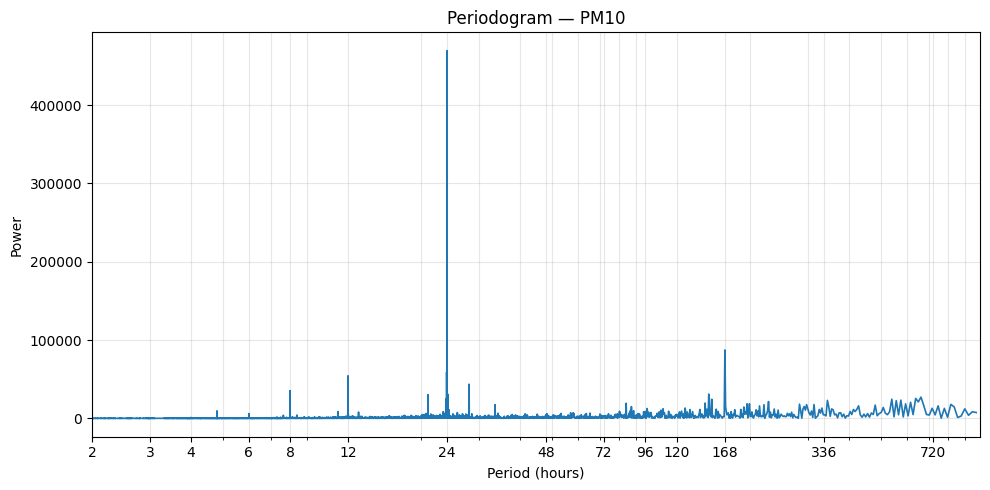

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- SETTINGS ----
value_col = "PM10"    # change to "O3", "NO2", etc. if you want

# ---- 1) Build a DateTime index from Year + Julian day + Time (hour) ----
# Assumes your DataFrame is named df and has columns:
# ID, Year, Julianday, Time, NO2, O3, PM10, CO, temperature, humidity, windspeed, sinJD, cosJD, sinTime, cosTime

df = df.copy()

# Make a datetime: date from Year + (Julianday-1 days), then add hour=Time
base = pd.to_datetime(df["Year"].astype(int).astype(str), format="%Y")
dt = (base + pd.to_timedelta(df["Julianday"] - 1, unit="D")
             + pd.to_timedelta(df["Time"], unit="H"))

df = df.assign(DateTime=dt).set_index("DateTime").sort_index()

# Keep the column we want and ensure it's numeric
s = pd.to_numeric(df[value_col], errors="coerce")

# If there are multiple rows per hour, average them; then reindex to regular hourly steps
x = s.groupby(level=0).mean().resample("1H").mean()

# Fill small gaps smoothly (up to ~6h); backfill leading NaNs if any
x = x.interpolate(method="time", limit=6).bfill()

# ---- 2) Detrend & demean (keeps periodic parts) ----
t = np.arange(len(x))
m, b = np.polyfit(t, x.values, 1)
x_detr = x.values - (m * t + b)
x_detr = x_detr - np.mean(x_detr)

# ---- 3) FFT & power ----
N = len(x_detr)
X = np.fft.rfft(x_detr)
freqs = np.fft.rfftfreq(N, d=1.0)       # 1 sample per hour
power = (np.abs(X) ** 2) / N

# drop DC (freq=0) so we can convert to period
pos = freqs > 0
freqs = freqs[pos]
power = power[pos]
period = 1.0 / freqs                    # hours

# ---- 4) Plot: Power vs Period (log x-axis) ----
mask = (period >= 2) & (period <= 1000)
order = np.argsort(period[mask])
ph = period[mask][order]
pw = power[mask][order]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ph, pw, linewidth=1.2)

ax.set_xscale("log")        # makes 2,4,8,16,32… evenly spaced
# ax.invert_xaxis()         # optional: keep short periods on the RIGHT
ax.set_xlim(2, 1000)
ax.set_xlabel("Period (hours)")
ax.set_ylabel("Power")
ax.set_title(f"Periodogram — {value_col}")
ax.grid(True, which="both", alpha=0.3)

# helpful ticks at common cycles
ax.set_xticks([2,3,4,6,8,12,24,48,72,96,120,168,336,720])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.show()

# ---- 5) (Optional) quick helper to inspect key periods ----
def power_near(period_target):
    i = np.argmin(np.abs(period - period_target))
    return float(period[i]), float(power[i])

# Example:
# for P in [8, 12, 24, 168]:
#     P_est, Pow = power_near(P)
#     print(f"~{P_est:.1f} h -> power = {Pow:.3e}")



Question:

Near-by cycle = What hour of the day do we peak? and why?

Far-by cycle = weekly/seasonal (≥7 days): Which days of week  are higher? describe why?

Consider other environmental variables as well same as PM10

Question:
If two points are very close in the original data, what should you expect about their positions in the 2D Sammon plot?




In [ ]:
!pip install scikit-learn==1.7.1



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


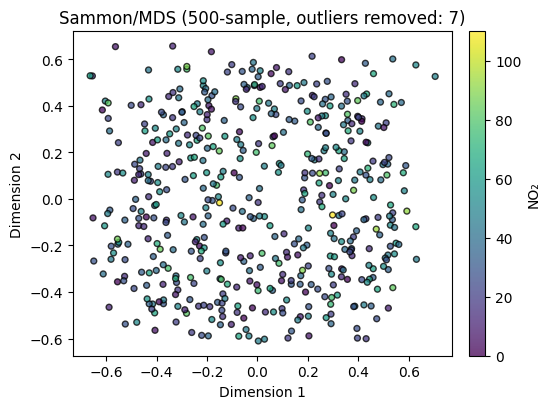

In [16]:
# Sammon/MDS on 500-row sample with automatic outlier removal (|z| > 4)
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
np.random.seed(0)
# 1) Load required columns and drop missing
cols = ["NO2", "O3", "PM10", "CO", "temperature", "humidity", "windspeed"]

df = df.copy()
df = df.apply(pd.to_numeric, errors="coerce").dropna()
# 2) Take random sample of 500 rows
sample = df.sample(n=500, random_state=42).reset_index(drop=True)

# 3) Outlier removal using z-scores (per variable, on the sample)
X = sample.values.astype(float)
mu = X.mean(axis=0); sd = X.std(axis=0, ddof=1)
Z = (X - mu) / sd
mask = (np.abs(Z) <= 4).all(axis=1)   # keep rows where all |z| <= 4
clean = sample.loc[mask].reset_index(drop=True)

# 4) Standardize (z-score) AFTER outlier removal
X_clean = clean.values.astype(float)
X_scaled = StandardScaler().fit_transform(X_clean)

# 5) Non-metric MDS (Sammon-like) with Euclidean dissimilarity
mds = MDS(n_components=2, metric=False, dissimilarity="euclidean",
          n_init=4, max_iter=1000, random_state=0)
Y = mds.fit_transform(X_scaled)

# 6) Plot, color by NO2
no2 = clean["NO2"].to_numpy()
fig, ax = plt.subplots(figsize=(5.6, 4.2))
sc = ax.scatter(Y[:,0], Y[:,1], c=no2, s=18, edgecolor="k", alpha=0.75)
cb = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04); cb.set_label("NO₂")
ax.set_title(f"Sammon/MDS (500-sample, outliers removed: {len(sample)-len(clean)})")
ax.set_xlabel("Dimension 1"); ax.set_ylabel("Dimension 2")
plt.tight_layout(); plt.show()

Question:
Does the Sammon map reveal clearly separated clusters of samples?

Do the points with the very highest NO₂ values occupy a specific corner of the map, indicating extreme conditions distinct from the rest of the dataset?

Change the z-score value to find outliers.
